In [31]:
library(dplyr) 
library(factoextra) 
library(caret)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: lattice



# Факторный анализ 
## Фахртдинов Тимур

О наборе данных:<br>
Данные о недоношенных младенцах, у которых вовремя не закрылся артериальный проток.

Рассмотрим 4 независимые переменные:<br>
**O2 1** -- Насыщение крови кислородом до.<br>
**O2 2** -- Насыщение крови кислородом после.<br>
**PA1** -- Артериальное давление до.<br>
**PA2** -- Артериальное давление после.<br>

In [24]:
data <-read.csv("baseMA.csv", sep = ";")
data <- data.frame(data$O2.1, data$O2.2, data$PA1, data$PA2)
data <- na.omit(data)

Ищем коэффициенты главных компонент

$Y_j = A^{T}_j X = \sum_{i = 1}^k \alpha_{ij}X_i$

In [36]:
or_data <- data
data <- scale(data)
sigma <- cov(data)
A <- eigen(sigma)$vectors
Y <- data %*% A
head(Y)

1,-0.7139358,-0.2703558,0.33073608,-0.1980811
2,-0.1981581,-0.6917187,-0.55081640,1.3268963
5,-0.3317636,0.8013227,2.21677700,-0.2662600
6,-1.0701976,0.4861400,0.27973997,0.1666988
7,-0.7366246,1.5821543,0.02170634,0.3733386
8,-0.9408384,-0.5004720,-0.10722609,0.4986809


Сравним результат с результатом встроенной функции:

In [15]:
head(prcomp(data)$x)

,PC1,PC2,PC3,PC4
1,-0.7139358,0.2703558,-0.33073608,0.1980811
2,-0.1981581,0.6917187,0.55081640,-1.3268963
5,-0.3317636,-0.8013227,-2.21677700,0.2662600
6,-1.0701976,-0.4861400,-0.27973997,-0.1666988
7,-0.7366246,-1.5821543,-0.02170634,-0.3733386
8,-0.9408384,0.5004720,0.10722609,-0.4986809


Посмотрим на долю дисперсии, объясняемой каждой компонентой.

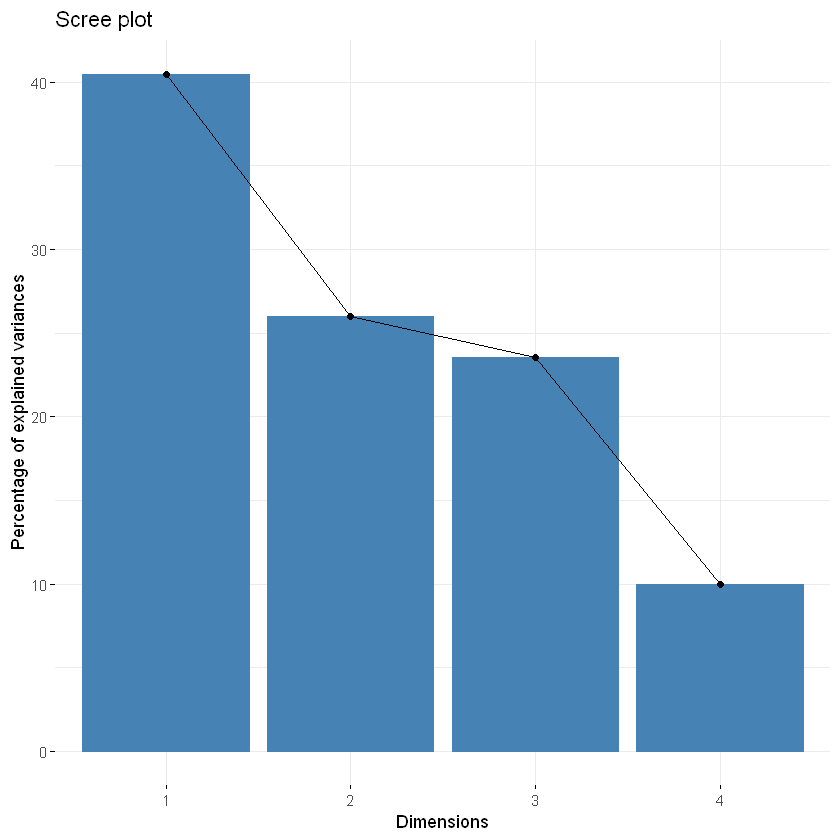

In [32]:
fviz_eig(prcomp(data))

Найдем факторные нагрузки:

$$\beta_{ij} = \frac{\alpha_{ij} \sqrt{\lambda_j}}{\sigma_i}$$

In [17]:
beta <- matrix(0, nrow(A), nrow(A))
for (i in 1:nrow(A)){
    for (j in 1:nrow(A)){
        beta[i, j] <- A[i, j] * sqrt(var(Y[, j])) / sd(data[, i])
    }
}
beta

-0.88868391,-0.01978819,-0.1018347,0.44663076
-0.88349056,-0.10590914,-0.1040025,-0.44430975
0.03622878,0.78585741,-0.6166925,-0.02838955
-0.21767673,0.64143663,0.7352284,-0.02480107


Найдем факторы:

$$G_j = \frac{Y_j}{ \sqrt{\lambda_j}}$$

In [20]:
G <- apply(Y, 2, function(x) x / sd(x))
head(G)

1,0.5610924,-0.2650265,0.34075554,-0.3138570
2,0.1557353,-0.6780835,-0.56750306,2.1024501
5,0.2607377,0.7855270,2.28393297,-0.4218855
6,0.8410836,0.4765572,0.28821453,0.2641322
7,0.5789238,1.5509669,0.02236392,0.5915502
8,0.7394184,-0.4906067,-0.11047444,0.7901535


Посмотрим на biplot:

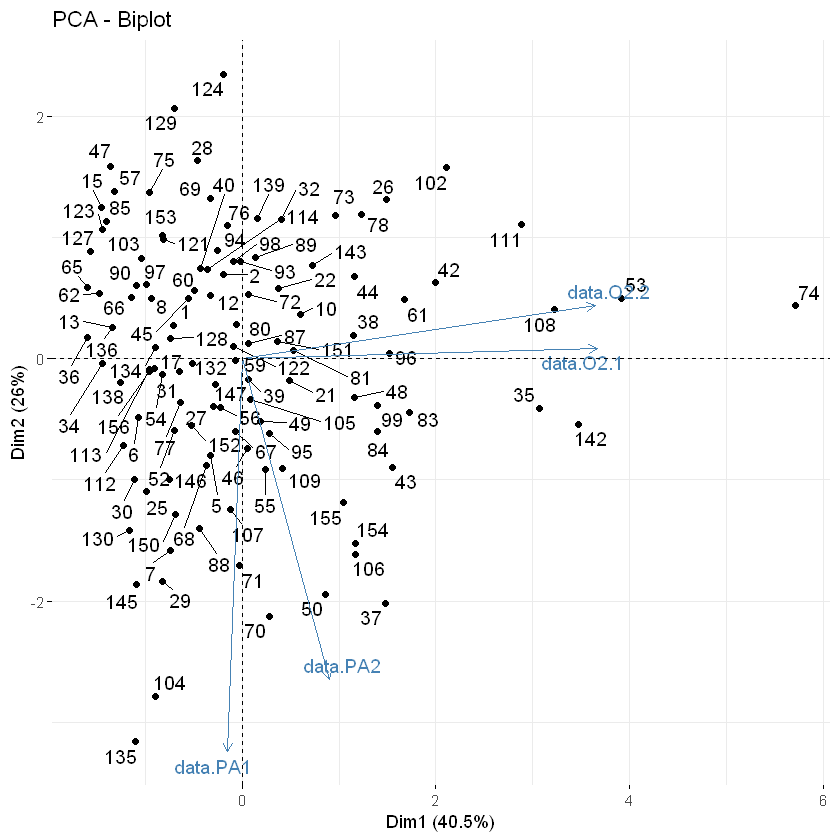

In [37]:
fviz_pca_biplot(prcomp(data), repel = TRUE)

Восстановим признаки по формуле:

$$X_i = \sigma_i \sum_{j = 1}^k \beta_{ij}G_j$$

In [30]:
X_rec <- c()
for (i in 1:ncol(beta)){
    G_rec <- numeric(nrow(data))
    for (j in 1:ncol(beta)){
        G_rec <- G_rec + beta[i, j] * G[, j]
    }
    X_rec <- cbind(X_rec, (sd(data[, i]) * G_rec * sd(or_data[, i]) + mean(or_data[, i])))
}
head(X_rec)
head(or_data)

1,0.25,0.30,45,53
2,0.45,0.21,47,43
5,0.25,0.30,40,77
6,0.25,0.21,53,57
7,0.30,0.21,66,63
8,0.30,0.21,46,47


,data.O2.1,data.O2.2,data.PA1,data.PA2
,<dbl>,<dbl>,<int>,<int>
1,0.25,0.30,45,53
2,0.45,0.21,47,43
5,0.25,0.30,40,77
6,0.25,0.21,53,57
7,0.30,0.21,66,63
8,0.30,0.21,46,47
